In [1]:
import gizmo_analysis as gizmo
import matplotlib.pyplot as plt
from matplotlib import colors
import asdf
import numpy as np

plt.rcParams.update({"font.family": "serif"})

loading data

In [2]:
af = asdf.open('m12i_symmetry_axes.asdf')

af.info()

In [5]:
r = af["radius"]
L = af["angular.momentum"]
min_axs = np.array([af["symmetry.axes"][i][2] for i in range(len(af["symmetry.axes"]))])
maj_axs = np.array([af["symmetry.axes"][i][0] for i in range(len(af["symmetry.axes"]))])

# permute vector to face closest to the angular momentum vector AND normalize it
def permuteVector(vec, ref):
    if np.dot(ref, vec) < 0.0:
        return -1*np.array(vec)/np.linalg.norm(vec)
    else:
        return vec/np.linalg.norm(vec)
    
min_axs_corrected = np.array([permuteVector(ax_i, L) for ax_i in min_axs])
maj_axs_corrected = np.array([permuteVector(ax_k, L) for ax_k in maj_axs])

In [4]:
sim_dir = "../../../data/latte_metaldiff/"
sims_name = "m12i_res7100"
part = gizmo.io.Read.read_snapshots(["dark"], "redshift", 0, sim_dir + sims_name, assign_hosts_rotation=True)


# in utilities.simulation.Snapshot():
* reading:  data/latte_metaldiff/m12i_res7100/snapshot_times.txt

* input redshift = 0:  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  data/latte_metaldiff/m12i_res7100/output/snapdir_600/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 70514272 particles
    dark2     (id = 2): 5513331 particles
    gas       (id = 0): 57060074 particles
    star      (id = 4): 13976485 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['dark']

* reading particles from:
    snapshot_600.0.hdf5
    snapshot_600.1.hdf5
    snapshot_600.2.hdf5
    snapshot_600.3.hdf5

* reading cosmological parameters from:  data/latte_metaldiff/m12i_res7100/initial_condition/ic_agora_m12i.conf

* checking sanity of particle properties


# in gizmo_analysis.gizmo_track.ParticleCoordinate():
  read 1 host (position, velocity, principal axes)

making the plot

In [6]:
pos_dark = part["dark"].prop("host.distance")

In [7]:
host_minor_ax = part.host["rotation"][0, 2]

In [8]:
scale = 1000
bins = 250
vmax = 10000
vmin = 10
k = 750

In [9]:
xym = (abs(pos_dark[:, 0]) < scale) & (abs(pos_dark[:, 1]) < scale)
xzm = (abs(pos_dark[:, 0]) < scale) & (abs(pos_dark[:, 2]) < scale)
yzm = (abs(pos_dark[:, 1]) < scale) & (abs(pos_dark[:, 2]) < scale)

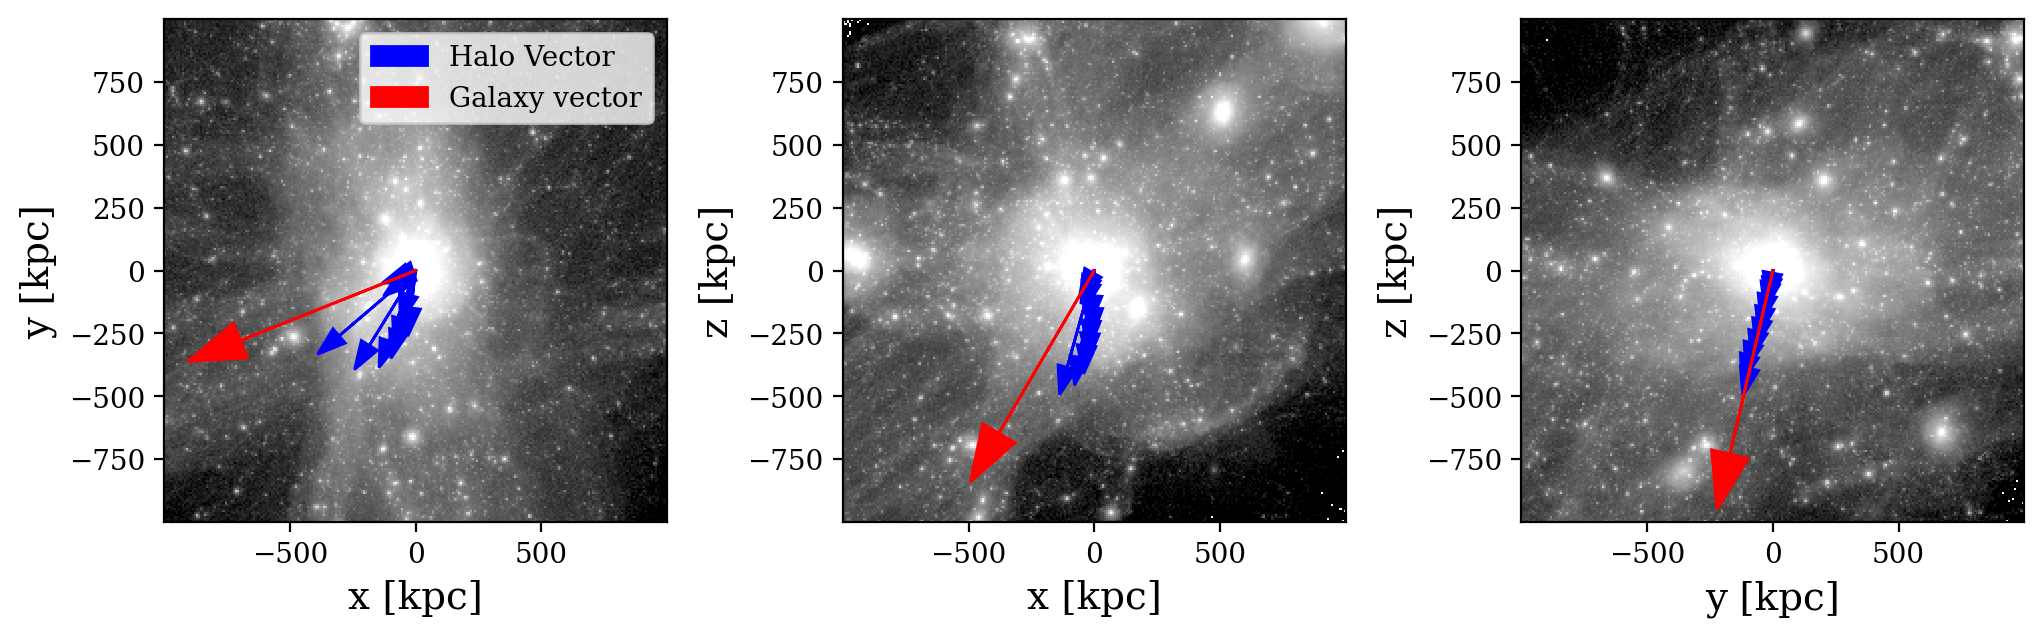

CPU times: user 12.7 s, sys: 7.15 s, total: 19.9 s
Wall time: 19.7 s


In [33]:
%%time
fig, axs = plt.subplots(1,3,figsize=(12,5), dpi=200)

(xy, xz, yz) = axs

# plot DM particles 
xy.hist2d(
    pos_dark[:, 0][xym],
    pos_dark[:, 1][xym],
    bins=bins,
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
    cmap="binary_r"
)

xz.hist2d(
    pos_dark[:, 0][xzm],
    pos_dark[:, 2][xzm],
    bins=bins,
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
    cmap="binary_r"
)

yz.hist2d(
    pos_dark[:, 1][yzm],
    pos_dark[:, 2][yzm],
    bins=bins,
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
    cmap="binary_r"
)

# show the halo vector

for i, radius in enumerate(r):
    
    arrow_scale = radius
    if i == 0:
        xy.arrow(
        0, 0,
        arrow_scale*np.array(min_axs_corrected[i, 0]) / np.linalg.norm([min_axs_corrected[i, 0], min_axs_corrected[i, 1]]),
        arrow_scale*np.array(min_axs_corrected[i, 1]) / np.linalg.norm([min_axs_corrected[i, 0], min_axs_corrected[i, 1]]),
        color='b',
        label="Halo Vector",
        head_width=k/10
    )
    else:
        xy.arrow(
            0, 0,
            arrow_scale*np.array(min_axs_corrected[i, 0]) / np.linalg.norm([min_axs_corrected[i, 0], min_axs_corrected[i, 1]]),
            arrow_scale*np.array(min_axs_corrected[i, 1]) / np.linalg.norm([min_axs_corrected[i, 0], min_axs_corrected[i, 1]]),
            color='b',
            head_width=k/10
        )
        
    xz.arrow(
        0, 0,
        arrow_scale*np.array(min_axs_corrected[i, 0]) / np.linalg.norm([min_axs_corrected[i, 0], min_axs_corrected[i, 2]]),
        arrow_scale*np.array(min_axs_corrected[i, 2]) / np.linalg.norm([min_axs_corrected[i, 0], min_axs_corrected[i, 2]]),
        color='b',
        head_width=k/10
    )

    yz.arrow(
        0, 0,
        arrow_scale*np.array(min_axs_corrected[i, 1]) / np.linalg.norm([min_axs_corrected[i, 1], min_axs_corrected[i, 2]]),
        arrow_scale*np.array(min_axs_corrected[i, 2]) / np.linalg.norm([min_axs_corrected[i, 1], min_axs_corrected[i, 2]]),
        color='b',
        head_width=k/10
    )

# focus = xy.scatter(
#     k*min_axs_corrected[:, 0] / np.linalg.norm(min_axs_corrected[:, 0]),
#     k*min_axs_corrected[:, 1] / np.linalg.norm(min_axs_corrected[:, 1]),
#     c=r,
#     label="DM halo minor axis"
# )

# xz.scatter(
#     k*min_axs_corrected[:, 0] / np.linalg.norm(min_axs_corrected[:, 0]),
#     k*min_axs_corrected[:, 2] / np.linalg.norm(min_axs_corrected[:, 2]),
#     c=r
# )

# yz.scatter(
#     k*min_axs_corrected[:, 1] / np.linalg.norm(min_axs_corrected[:, 1]),
#     k*min_axs_corrected[:, 2] / np.linalg.norm(min_axs_corrected[:, 2]),
#     c=r
# )

# Plot angular momentum vector
# xy.plot(
#     [0, k*L[0]],
#     [0, k*L[1]],
#     c='r',
#     label="Angular momentum vector"
# )

# xz.plot(
#     [0, k*L[0]],
#     [0, k*L[2]],
#     c='r'
# )

# yz.plot(
#     [0, k*L[1]],
#     [0, k*L[2]],
#     c='r'
# )

####

# show the galaxy vector
xy.arrow(
    0, 0,
    k*host_minor_ax[0] / np.linalg.norm([host_minor_ax[0], host_minor_ax[1]]),
    k*host_minor_ax[1] / np.linalg.norm([host_minor_ax[0], host_minor_ax[1]]),
    color='r',
    label="Galaxy vector",
    head_width=k/5
)

xz.arrow(
    0, 0,
    k*host_minor_ax[0] / np.linalg.norm([host_minor_ax[0], host_minor_ax[2]]),
    k*host_minor_ax[2] / np.linalg.norm([host_minor_ax[0], host_minor_ax[2]]),
    color='r',
    head_width=k/5
)

yz.arrow(
    0, 0,
    k*host_minor_ax[1] / np.linalg.norm([host_minor_ax[1], host_minor_ax[2]]),
    k*host_minor_ax[2] / np.linalg.norm([host_minor_ax[1], host_minor_ax[2]]),
    color='r',
    head_width=k/5
)

xy.set_aspect(1)
xz.set_aspect(1)
yz.set_aspect(1)

xy.set_xlabel("x [kpc]", size=14)
xz.set_xlabel("x [kpc]", size=14)
yz.set_xlabel("y [kpc]", size=14)

xy.set_ylabel("y [kpc]", size=14)
xz.set_ylabel("z [kpc]", size=14)
yz.set_ylabel("z [kpc]", size=14)

# cax = fig.add_axes([0.5 - (0.6 / 2), 0.05, 0.6, 0.05])

# cb = plt.colorbar(focus, cax=cax, orientation="horizontal")

# cb.set_label(label='$r$ (kpc)', size=18)

xy.legend()

fig.subplots_adjust(wspace=.35)

plt.savefig("m12i_density.png", bbox_inches="tight")

plt.show()

with circles

In [6]:
af.info()

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 2.10.1
├─history (dict)
│ └─extensions (list)
│   └─[0] (ExtensionMetadata) ...
├─angular.momentum (NDArrayType): shape=(3,), dtype=float64
├─eigenvalues (list)
│ ├─[0] (NDArrayType): shape=(3,), dtype=float64
│ ├─[1] (NDArrayType): shape=(3,), dtype=float64
│ ├─[2] (NDArrayType): shape=(3,), dtype=float64
│ ├─[3] (NDArrayType): shape=(3,), dtype=float64
│ ├─[4] (NDArrayType): shape=(3,), dtype=float64
│ ├─[5] (NDArrayType): shape=(3,), dtype=float64
│ ├─[6] (NDArrayType): shape=(3,), dtype=float64
│ ├─[7] (NDArrayType): shape=(3,), dtype=float64
│ ├─[8] (NDArrayType): shape=(3,), dtype=float64
│ └─[9] (NDArrayType): shape=(3,), dtype=float64
├─radius (list) ...
└─symmetry.axes (list) ...
Some nodes not shown.


In [22]:
# checking if eigenvalues are sorted for sanity
for ev in af["eigenvalues"]:
    # sorted descending
    print(np.all(ev[:-1] >= ev[1:]))

True
True
True
True
True
True
True
True
True
True


In [21]:
for ev, radius, axs in zip(af["eigenvalues"], af["radius"], af["symmetry.axes"]):
    a, b, c = ev
    s = c/a
    q = b/a
    
    a_vec, b_vec, c_vec = axs
        
    c, b = radius*np.array([s,q])
    
    smaxy = np.dot([[a, 0], [0, b]], [[axs[0][0], axs[0][1]], [axs[1][0], axs[1][1]]])
    smaxz = np.dot([[a, 0], [0, c]], [[axs[0][0], axs[0][2]], [axs[2][0], axs[2][2]]])
    smayz = np.dot([[a, 0], [0, c]], [[axs[1][1], axs[1][2]], [axs[2][1], axs[2][2]]])
    
    print(c, b, radius)

8.525458822777885 9.936627412930676 10
24.17895616106219 28.939947140120236 30
39.07460215487364 46.68565225404079 50
75.82302886326293 88.07855652899325 100
112.84530844510209 130.5371355870873 150
150.56973686149385 173.0278892141558 200
183.46296941081363 215.1620809517698 250
216.04033885577394 250.06522046475544 300
248.40889580144795 283.50898525271543 350
278.79157690558895 314.97047979286134 400


In [24]:
af["symmetry.axes"][0][:2, :2]

array([[-0.19794809, -0.93841314],
       [-0.85468115,  0.30669355]])

In [27]:
[0][0]

-0.1979480852508652

In [55]:
idx     = 4
axs     = af["symmetry.axes"][idx]
radius  = af["radius"][idx]
ev      = af["eigenvalues"][idx]

a, b, c = ev
s = c/a
q = b/a
    
a_vec, b_vec, c_vec = axs
    
c, b = radius*np.array([s,q])

print(c, b, radius)
    
smaxy = np.dot([[radius, 0], [0, b]], [[axs[0][0], axs[0][1]], [axs[1][0], axs[1][1]]])
smaxz = np.dot([[radius, 0], [0, b]], [[axs[0][0], axs[0][2]], [axs[2][0], axs[2][2]]])
smayz = np.dot([[radius, 0], [0, b]], [[axs[1][1], axs[1][2]], [axs[2][1], axs[2][2]]])

112.84530844510209 130.5371355870873 150


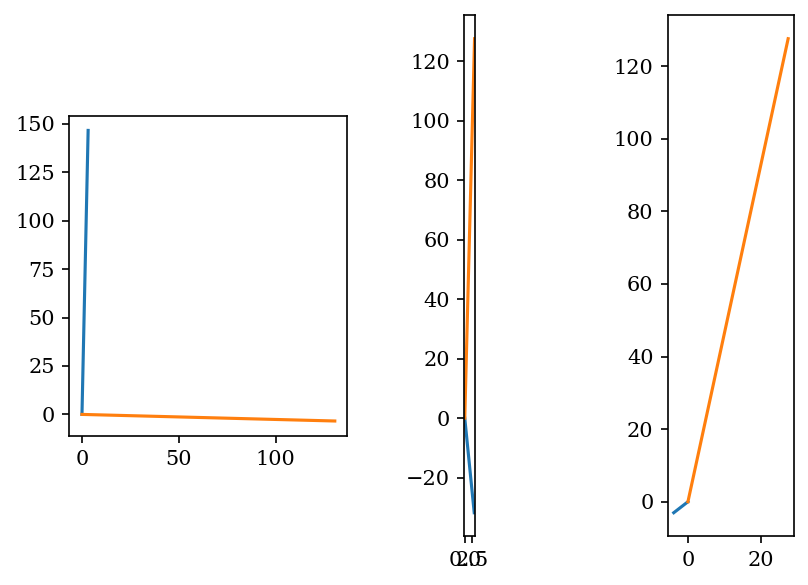

In [57]:
fig, ax = plt.subplots(1, 3, dpi=150)
for a in ax:
    a.set_aspect(1)
ax[0].plot([0, smaxy[0, 0]], [0, smaxy[0, 1]])
ax[0].plot([0, smaxy[1, 0]], [0, smaxy[1, 1]])
s
ax[1].plot([0, smaxz[0, 0]], [0, smaxz[0, 1]])
ax[1].plot([0, smaxz[1, 0]], [0, smaxz[1, 1]])

ax[2].plot([0, smayz[0, 0]], [0, smayz[0, 1]])
ax[2].plot([0, smayz[1, 0]], [0, smayz[1, 1]])
fig.tight_layout()

In [31]:
smaxy

array([[-3.58188613e+05, -3.05818282e+06],
       [-4.49317159e+01,  7.65888829e+00]])

In [40]:
a

3163402.6605934286

1.0

In [41]:
ev

array([3163402.66059343, 2953710.33103944, 2472174.00836714])

In [49]:
np.dot([smaxy[0, 0], smaxy[0, 1]], [smaxy[1, 0], smaxy[1, 1]])

-115.82862449576226